In [1]:
import pyspark

In [2]:
import pandas as pd
pd.read_csv('employee_satisfaction.csv')

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216


In [24]:
from pyspark.sql import SparkSession
from sklearn.model_selection import train_test_split

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Sparky').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/25 22:03:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
spark


In [6]:
df_pyspark=spark.read.csv('employee_satisfaction.csv')

In [7]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored

#from markupsafe import escape
#!pip install pandas-profiling
#import pandas_profiling
!pip install sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install lightgbm

from lightgbm import LGBMClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#see model parametres
from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "green"))

ModuleNotFoundError: No module named 'termcolor'

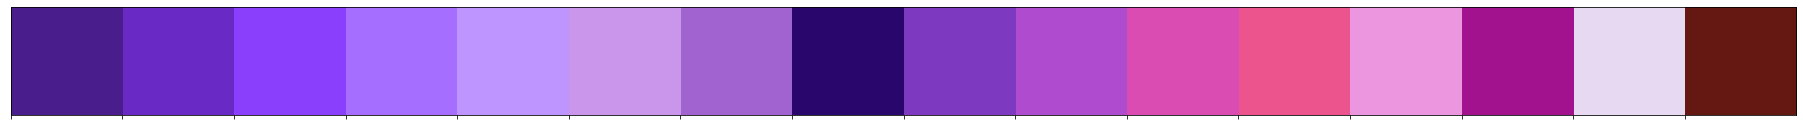

In [8]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)

In [10]:
wine = pd.read_csv('employee_satisfaction.csv')
df = wine.copy()
df.head(n = 10).style.background_gradient(cmap = "Purples_r")

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.700000,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.800000,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.400000,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.400000,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.500000,IT,Team Lead,Jan-05,101133
5,Jonathan King,24,Male,5,63,33,4.200000,Sales,Junior Developer,Jan-21,48740
6,Kyle Figueroa,33,Female,13,41,39,2.300000,Sales,Analyst,Jan-18,73502
7,Shannon Allen,23,Female,4,92,68,2.800000,HR,Intern,Jan-21,39670
8,Daryl Noble,30,Female,7,32,43,2.300000,Marketing,Junior Developer,Jan-19,49323
9,Tracy Figueroa,39,Female,17,10,15,1.100000,HR,Team Lead,Jan-04,92915


In [11]:
df.describe().T.style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
Age,200.000000,34.650000,9.797318,22.000000,26.000000,32.000000,41.000000,60.000000
Projects Completed,200.000000,11.455000,6.408849,0.000000,6.000000,11.000000,17.000000,25.000000
Productivity (%),200.000000,46.755000,28.530068,0.000000,23.000000,45.000000,70.000000,98.000000
Satisfaction Rate (%),200.000000,49.935000,28.934353,0.000000,25.750000,50.500000,75.250000,100.000000
Feedback Score,200.000000,2.883000,1.123263,1.000000,1.900000,2.800000,3.900000,4.900000
Salary,200.000000,76619.245000,27082.299202,30231.000000,53080.500000,80540.000000,101108.250000,119895.000000


In [12]:
print("In total there are {} null values in the dataset.".format(df.isnull().sum().sum()))

In total there are 0 null values in the dataset.


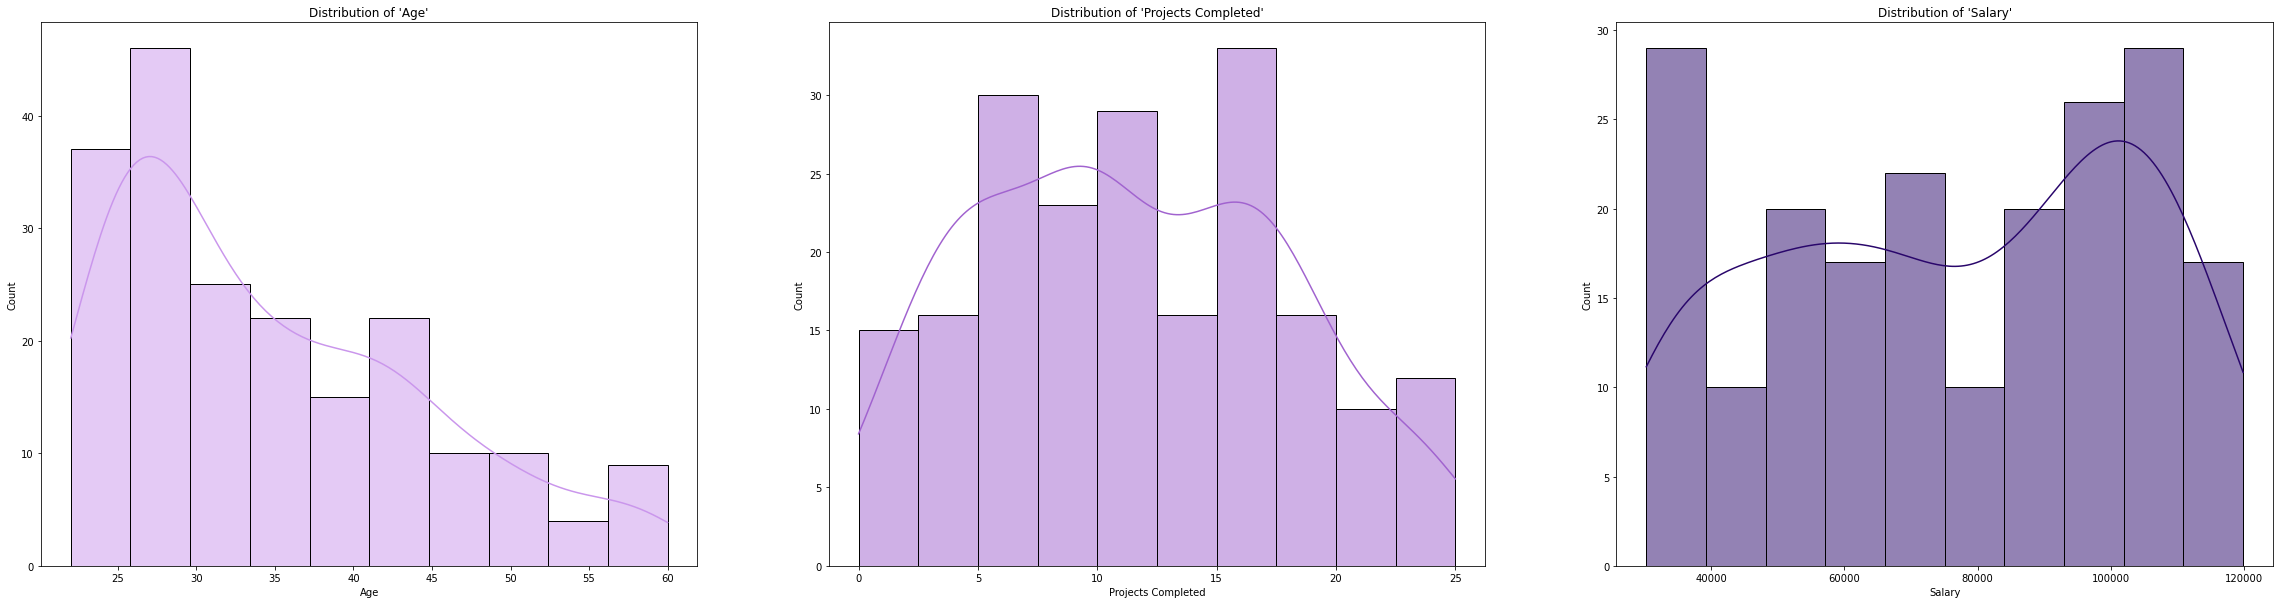

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax = axes[0], x = df["Age"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'Age'");

sns.histplot(ax = axes[1], x = df["Projects Completed"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'Projects Completed'");

sns.histplot(ax = axes[2], x = df["Salary"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'Salary'");

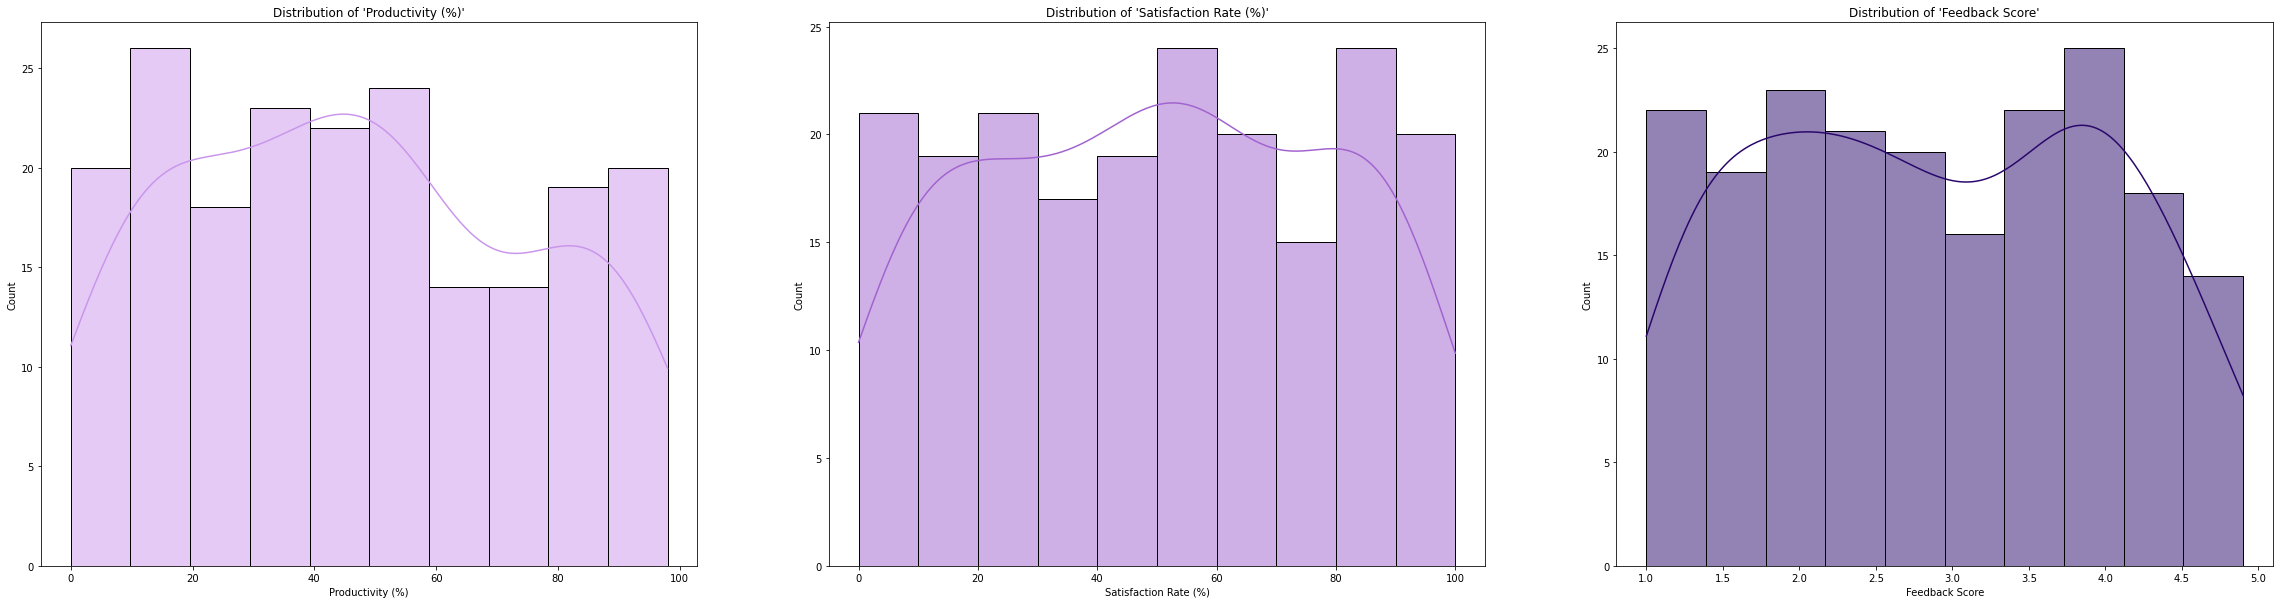

In [16]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax = axes[0], x = df["Productivity (%)"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'Productivity (%)'");

sns.histplot(ax = axes[1], x = df["Satisfaction Rate (%)"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'Satisfaction Rate (%)'");

sns.histplot(ax = axes[2], x = df["Feedback Score"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'Feedback Score'");

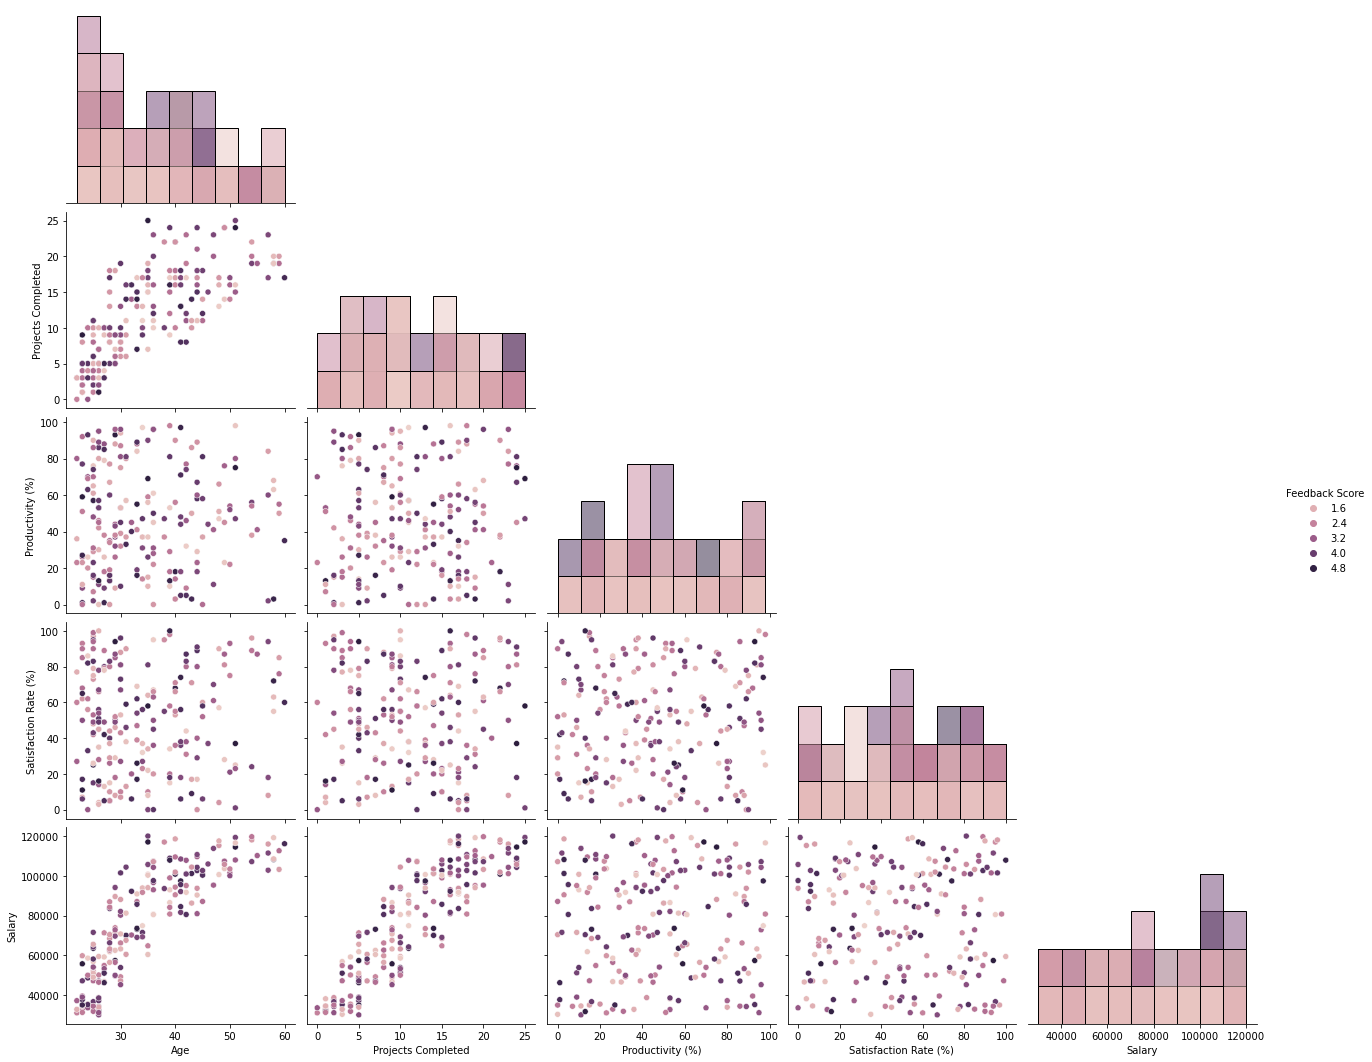

In [18]:
sns.pairplot(df, diag_kind = "hist", hue = "Feedback Score", height = 3, aspect = 1.2, corner = True);

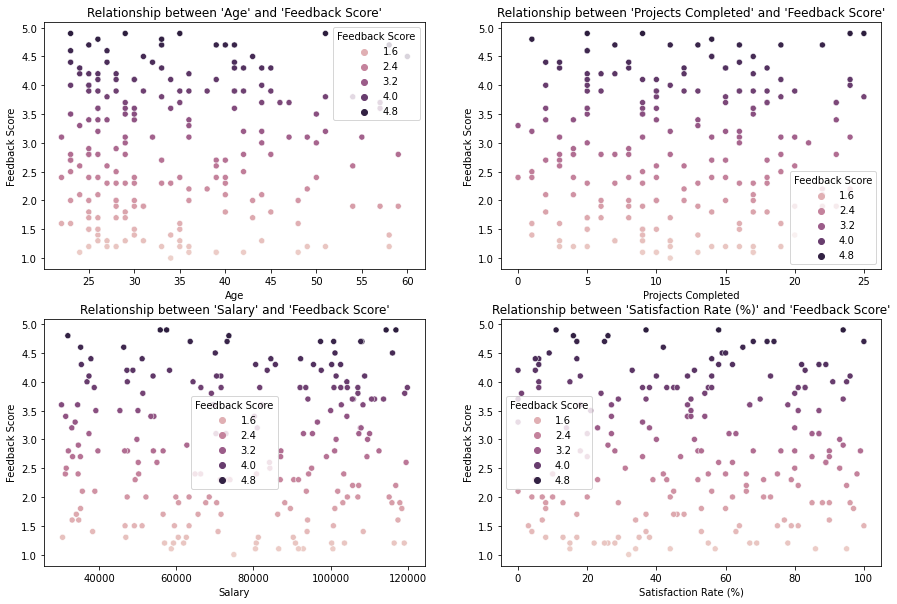

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "Age",
                y = "Feedback Score", hue = "Feedback Score",
                data = df).set(title = "Relationship between 'Age' and 'Feedback Score'");

sns.scatterplot(ax = axes[1],
                x = "Projects Completed",
                y = "Feedback Score", hue = "Feedback Score",
                data = df).set(title = "Relationship between 'Projects Completed' and 'Feedback Score'");

sns.scatterplot(ax = axes[2],
                x = "Salary",
                y = "Feedback Score", hue = "Feedback Score",
                data = df).set(title = "Relationship between 'Salary' and 'Feedback Score'");

sns.scatterplot(ax = axes[3],
                x = "Satisfaction Rate (%)",
                y = "Feedback Score", hue = "Feedback Score",
                data = df).set(title = "Relationship between 'Satisfaction Rate (%)' and 'Feedback Score'");

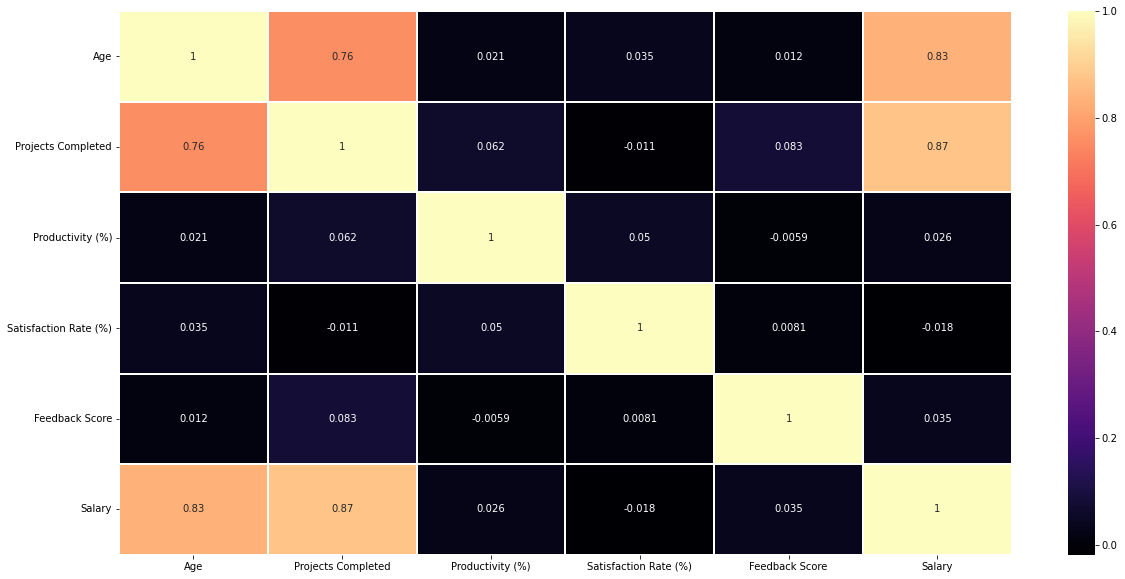

In [21]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

In [22]:
# select dependent variable 
y = df["Satisfaction Rate (%)"]

# select independent variable
x = df.drop("Satisfaction Rate (%)", axis = 1)

In [25]:
#Split dataset into Train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)

In [34]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import pandas as pd



In [36]:
encoder = OneHotEncoder(drop='first', sparse=False)
x_train_encoded = encoder.fit_transform(x_train[['Gender']])
x_test_encoded = encoder.transform(x_test[['Gender']])

# Retrieve the feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(input_features=['Gender'])

x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=encoded_feature_names)
x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=encoded_feature_names)


In [37]:
#print variables to test if estimator transforms feature into range of 0-1
print(x_train[0:5])
print("\n")
print(x_train.shape)
print("_________________________________________________________________________")
print(x_test[0:5])
print("\n")
print(x_test.shape)

                 Name  Age  Gender  Projects Completed  Productivity (%)  \
98     Cheryl Spencer   29    Male                   7                38   
123    Jeffery Fields   28    Male                   8                35   
119     Adrian Walker   57  Female                  17                60   
53   Alexis Smith DDS   44    Male                  16                60   
33    Steven Anderson   26  Female                   3                 0   

     Feedback Score Department          Position Joining Date  Salary  
98              1.3    Finance           Analyst       Jan-18   62588  
123             2.9      Sales           Analyst       Jan-18   62727  
119             3.6    Finance           Manager       Jan-02  102771  
53              3.2         HR  Senior Developer       Jan-07   80976  
33              1.3  Marketing            Intern       Jan-21   30509  


(150, 10)
_________________________________________________________________________
                 Name  Ag

In [38]:
print(y_train.head())
print(y_train.shape)
print("___________________________")
print(y_test.head())
print(y_test.shape)

98     29
123    26
119    18
53     80
33     35
Name: Satisfaction Rate (%), dtype: int64
(150,)
___________________________
58     61
40     20
34     37
102    36
184     6
Name: Satisfaction Rate (%), dtype: int64
(50,)


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier
knn = KNeighborsClassifier()




In [51]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
